# Ingreso a Drive y GitHub

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from getpass import getpass

PASS = getpass('Enter your password')

!git config --global user.email "jltg_1501@hotmail.com"
!git config --global user.name "Jorge-1501"
!git config --global user.password {PASS}

Enter your password··········


In [3]:
!pwd

/content


In [4]:
%cd /content/drive/MyDrive/Colab_GitHub/Redes-Neuronales/Digitos/src

/content/drive/MyDrive/Colab_GitHub/Redes-Neuronales/Digitos/src


In [ ]:
!ls -al

conv.py			   network2.py
Épocas_dígitos.png	   network3.py
Épocas_SGDconMomentum.png  network.py
expand_mnist.py		   __pycache__
.ipynb_checkpoints	   Reconocimiento_digitos.ipynb
mnist_average_darkness.py  Tarea_2.pdf
mnist_loader.py		   Tarea3-Redes.ipynb
mnist_svm.py


In [ ]:
!git status

Refresh index: 100% (96/96), done.
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
#!git add .

In [ ]:
#!git commit -m 'Notebook creada: Tarea3-Redes'

In [ ]:
#!git push

# Inicio de la Tarea 3

## Parte 1
Red con Keras

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

In [13]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
# Reestructuración los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
# Creación del modelo [784, 30, 10]
model = models.Sequential()
model.add(layers.Dense(784, activation='sigmoid', input_shape=(28 * 28,)))
model.add(layers.Dense(30, activation='sigmoid', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
# Compilar el modelo
custom_optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-09)

model.compile(optimizer = custom_optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=30, batch_size=10, validation_split=0.2)

Epoch 1/30
4800/4800 [==============================] - 22s 4ms/step - loss: 0.3658 - accuracy: 0.8999 - val_loss: 0.1831 - val_accuracy: 0.9463
Epoch 2/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1560 - accuracy: 0.9538 - val_loss: 0.1286 - val_accuracy: 0.9644
Epoch 3/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1088 - accuracy: 0.9679 - val_loss: 0.1111 - val_accuracy: 0.9695
Epoch 4/30
4800/4800 [==============================] - 18s 4ms/step - loss: 0.0855 - accuracy: 0.9754 - val_loss: 0.1062 - val_accuracy: 0.9716
Epoch 5/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0691 - accuracy: 0.9805 - val_loss: 0.1052 - val_accuracy: 0.9716
Epoch 6/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0560 - accuracy: 0.9840 - val_loss: 0.1110 - val_accuracy: 0.9722
Epoch 7/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0491 - accuracy: 0.9867 - val_loss: 0.0976 - val_ac

In [18]:
# Evaluación el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1202 - accuracy: 0.9819
Precisión en el conjunto de prueba: 0.9818999767303467


In [19]:
import matplotlib.pyplot as plt

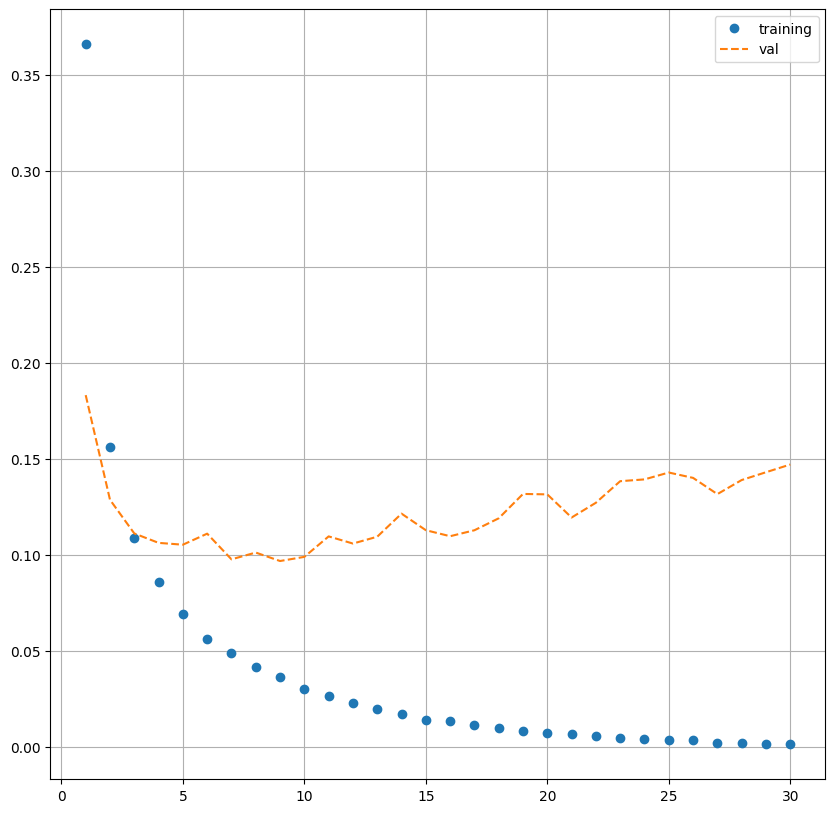

In [20]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.grid()
plt.show()

¿Obtuviste resultados similares? No, fueron notablemente mejores. Se obtuvo un accurancy del 0.9815 contra un 0.8412 del anterior modelo utilizando CPU. Mientras que al cambiar el entorno a una T4 GPU el tiempo se redujo a 9 minutos y un accurancy de 0.9818. El sobreajuste se mantiene igual en cada caso.


¿Tardó lo mismo para entrenar el mismo número de epocas? Tardó menos, un aproximado de 21 minutos contra los casi 30 anteriormente.

In [21]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [22]:
!git status
!git add .
!git commit -m "Modificación de entorno y corrección de número de capas en parte 1 de tarea 3"
!git push

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
[main 1e1f601] Modificación de entorno y corrección de número de capas en parte 1 de tarea 3
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Digitos/src/Tarea3-Redes.ipynb (98%)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 29.68 KiB | 2.97 MiB/s, done.
Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Jorge-1501/Redes-Neuronales
   fb88598..1e1f601  main -> main


## Parte 2

### Modificacion de parámetros 1

In [23]:
#import tensorflow as tf
#import matplotlib.pyplot as plt
#from tensorflow.keras import layers, models
#from tensorflow.keras.datasets import mnist
#from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Reestructuración los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [24]:
# Creación del modelo
model2 = models.Sequential()
model2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model2.add(layers.Dense(30, activation='relu', input_shape=(28 * 28,)))
model2.add(layers.Dense(10, activation='softmax'))

In [25]:
# Compilar el modelo
custom_optimizer2 = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model2.compile(optimizer = custom_optimizer2,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [26]:
# Entrenar el modelo
history2 = model2.fit(train_images, train_labels, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
4800/4800 [==============================] - 24s 5ms/step - loss: 0.3773 - accuracy: 0.8982 - val_loss: 0.1842 - val_accuracy: 0.9497
Epoch 2/50
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1574 - accuracy: 0.9556 - val_loss: 0.1350 - val_accuracy: 0.9621
Epoch 3/50
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1097 - accuracy: 0.9691 - val_loss: 0.1134 - val_accuracy: 0.9671
Epoch 4/50
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0826 - accuracy: 0.9764 - val_loss: 0.1003 - val_accuracy: 0.9697
Epoch 5/50
4800/4800 [==============================] - 18s 4ms/step - loss: 0.0655 - accuracy: 0.9814 - val_loss: 0.0879 - val_accuracy: 0.9753
Epoch 6/50
4800/4800 [==============================] - 19s 4ms/step - loss: 0.0514 - accuracy: 0.9858 - val_loss: 0.0896 - val_accuracy: 0.9733
Epoch 7/50
4800/4800 [==============================] - 17s 3ms/step - loss: 0.0413 - accuracy: 0.9888 - val_loss: 0.0799 - val_ac

In [27]:
# Evaluación el modelo en el conjunto de prueba
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc2)

313/313 [==============================] - 1s 3ms/step - loss: 0.1383 - accuracy: 0.9798
Precisión en el conjunto de prueba: 0.9797999858856201


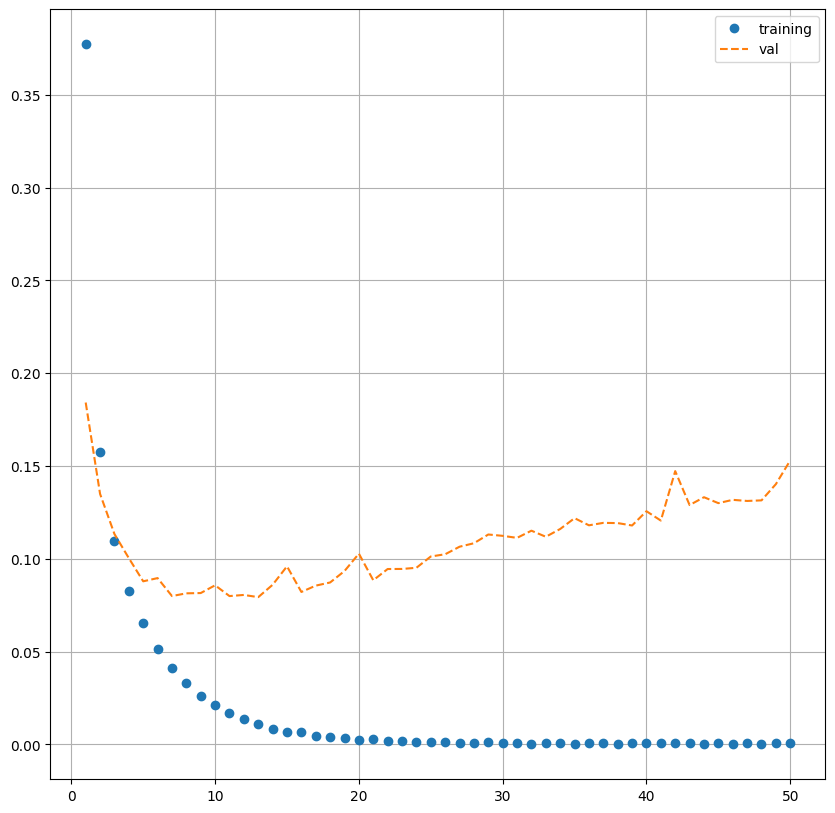

In [28]:
history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values2)+1)
plt.plot(epoch,loss_values2, 'o',label='training')
plt.plot(epoch,val_loss_values2, '--',label='val')
plt.legend()
plt.grid()
plt.show()

En esta red seleccioné un activación 'relu' para las capas ocultas y una softmax para la última capa. Aumenté el número de epocas por 50 y trabajé con una $\eta = 0.0001$ y Modifiqué el número de neuronas utilizadas de ([784,30,10]) por ([512,30,10]).
Los resultados fueron un mayor sobreajuste y saltos en la convergencia final, por estar muy cerca del accurancy de 1.000.

In [6]:
!git status
!git add .
!git commit -m "Cambio de función de activación, número de neuronas y optimizador, mayor sobreajuste"
!git push

Refresh index: 100% (96/96), done.
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
[main f050d97] Cambio de función de activación, número de neuronas y optimizador, mayor sobreajuste
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Digitos/src/Tarea3-Redes.ipynb (97%)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 30.74 KiB | 2.56 MiB/s, done.
Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Jorge-1501/Redes-Neuronales
   1e1f601..f050d97  main -> main


### Modificacion de parámetros 2

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [6]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
# Reestructuración los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
# Creación del modelo
model3 = models.Sequential()
model3.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
#model3.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model3.add(layers.Dense(24, activation='relu', input_shape=(28 * 28,)))
model3.add(layers.Dense(10, activation='softmax'))

In [11]:
# Compilar el modelo
custom_optimizer3 = Adam(learning_rate=0.00001, beta_1=0.95, beta_2=0.999, epsilon=1e-10)

model3.compile(optimizer = custom_optimizer3,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
# Entrenar el modelo
history3 = model3.fit(train_images, train_labels, epochs=30, batch_size=10, validation_split=0.2)

Epoch 1/30
4800/4800 [==============================] - 23s 4ms/step - loss: 1.0514 - accuracy: 0.7498 - val_loss: 0.4790 - val_accuracy: 0.8932
Epoch 2/30
4800/4800 [==============================] - 20s 4ms/step - loss: 0.4117 - accuracy: 0.8998 - val_loss: 0.3268 - val_accuracy: 0.9156
Epoch 3/30
4800/4800 [==============================] - 18s 4ms/step - loss: 0.3162 - accuracy: 0.9174 - val_loss: 0.2750 - val_accuracy: 0.9259
Epoch 4/30
4800/4800 [==============================] - 19s 4ms/step - loss: 0.2719 - accuracy: 0.9280 - val_loss: 0.2450 - val_accuracy: 0.9342
Epoch 5/30
4800/4800 [==============================] - 19s 4ms/step - loss: 0.2429 - accuracy: 0.9347 - val_loss: 0.2239 - val_accuracy: 0.9381
Epoch 6/30
4800/4800 [==============================] - 18s 4ms/step - loss: 0.2213 - accuracy: 0.9398 - val_loss: 0.2087 - val_accuracy: 0.9440
Epoch 7/30
4800/4800 [==============================] - 18s 4ms/step - loss: 0.2040 - accuracy: 0.9447 - val_loss: 0.1952 - val_ac

In [13]:
# Evaluación el modelo en el conjunto de prueba
test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc3)

313/313 [==============================] - 1s 3ms/step - loss: 0.0943 - accuracy: 0.9722
Precisión en el conjunto de prueba: 0.9721999764442444


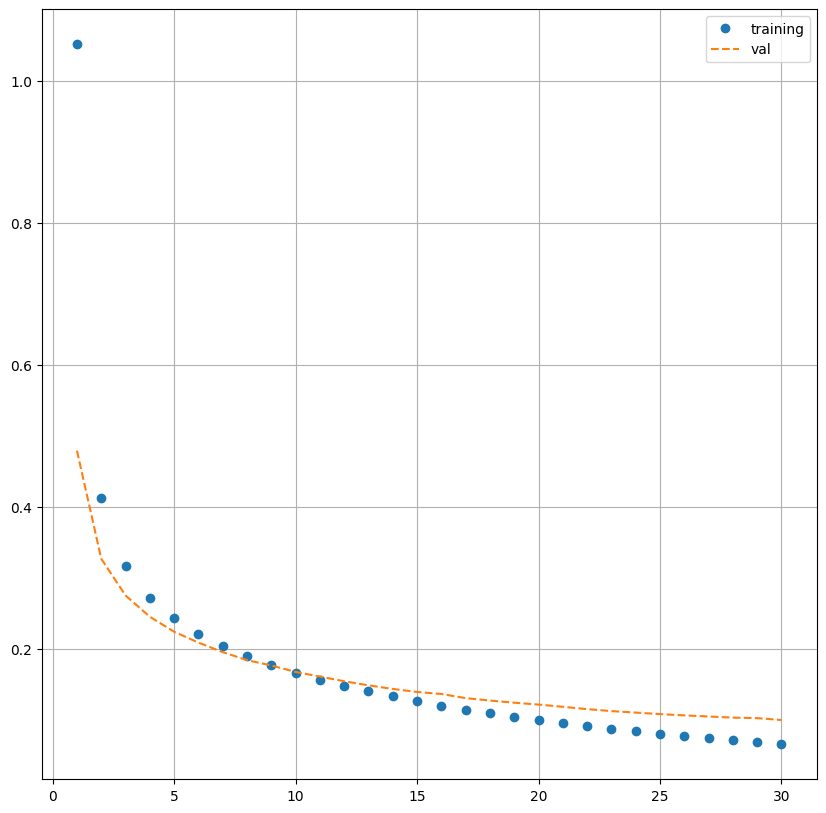

In [14]:
history_dict3 = history3.history
loss_values3 = history_dict3['loss']
val_loss_values3 = history_dict3['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values3)+1)
plt.plot(epoch,loss_values3, 'o',label='training')
plt.plot(epoch,val_loss_values3, '--',label='val')
plt.legend()
plt.grid()
plt.show()

En esta red seleccioné un activación 'relu' para las capas ocultas y una softmax para la última capa. Redujé el número de epocas a 30 y trabajé con una $\eta = 0.0001$ y Modifiqué el número de neuronas utilizadas de ([512,30,10]) por ([784,24,10]). También modifiqué los $\beta's$ para una aprendizaje más lento.

Los resultados no mostraron sobreajuste, pero la tasa de aprendizaje fue más lenta y obtuvo un menor accurancy, 0.9721 respecto a un 0.9797 de la anterior configuración.

In [15]:
!git status
!git add .
!git commit -m "Cambio de parámetros y número de neuronas. No hay sobreajuste pero accurancy menor."
!git push

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
[main 813279b] Cambio de parámetros y número de neuronas. No hay sobreajuste pero accurancy menor.
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Digitos/src/Tarea3-Redes.ipynb (97%)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 24.29 KiB | 2.70 MiB/s, done.
Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Jorge-1501/Redes-Neuronales
   f050d97..813279b  main -> main


### Tercera modificación

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# Reestructuración los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
# Creación del modelo
model4 = models.Sequential()
model4.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
#model3.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model4.add(layers.Dense(24, activation='relu', input_shape=(28 * 28,)))
model4.add(layers.Dense(10, activation='softmax'))

In [21]:
# Compilar el modelo
custom_optimizer4 = Adam(learning_rate=0.000005, beta_1=0.97, beta_2=0.999, epsilon=1e-10)

model4.compile(optimizer = custom_optimizer4,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [22]:
# Entrenar el modelo
history4 = model4.fit(train_images, train_labels, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
4800/4800 [==============================] - 20s 4ms/step - loss: 1.3797 - accuracy: 0.6732 - val_loss: 0.8039 - val_accuracy: 0.8366
Epoch 2/50
4800/4800 [==============================] - 19s 4ms/step - loss: 0.6556 - accuracy: 0.8543 - val_loss: 0.5068 - val_accuracy: 0.8842
Epoch 3/50
4800/4800 [==============================] - 18s 4ms/step - loss: 0.4726 - accuracy: 0.8881 - val_loss: 0.4014 - val_accuracy: 0.9021
Epoch 4/50
4800/4800 [==============================] - 19s 4ms/step - loss: 0.3921 - accuracy: 0.9021 - val_loss: 0.3459 - val_accuracy: 0.9134
Epoch 5/50
4800/4800 [==============================] - 18s 4ms/step - loss: 0.3448 - accuracy: 0.9119 - val_loss: 0.3106 - val_accuracy: 0.9198
Epoch 6/50
4800/4800 [==============================] - 18s 4ms/step - loss: 0.3122 - accuracy: 0.9183 - val_loss: 0.2857 - val_accuracy: 0.9237
Epoch 7/50
4800/4800 [==============================] - 21s 4ms/step - loss: 0.2878 - accuracy: 0.9240 - val_loss: 0.2662 - val_ac

In [23]:
# Evaluación el modelo en el conjunto de prueba
test_loss4, test_acc4 = model4.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc4)

313/313 [==============================] - 1s 3ms/step - loss: 0.1016 - accuracy: 0.9698
Precisión en el conjunto de prueba: 0.9697999954223633


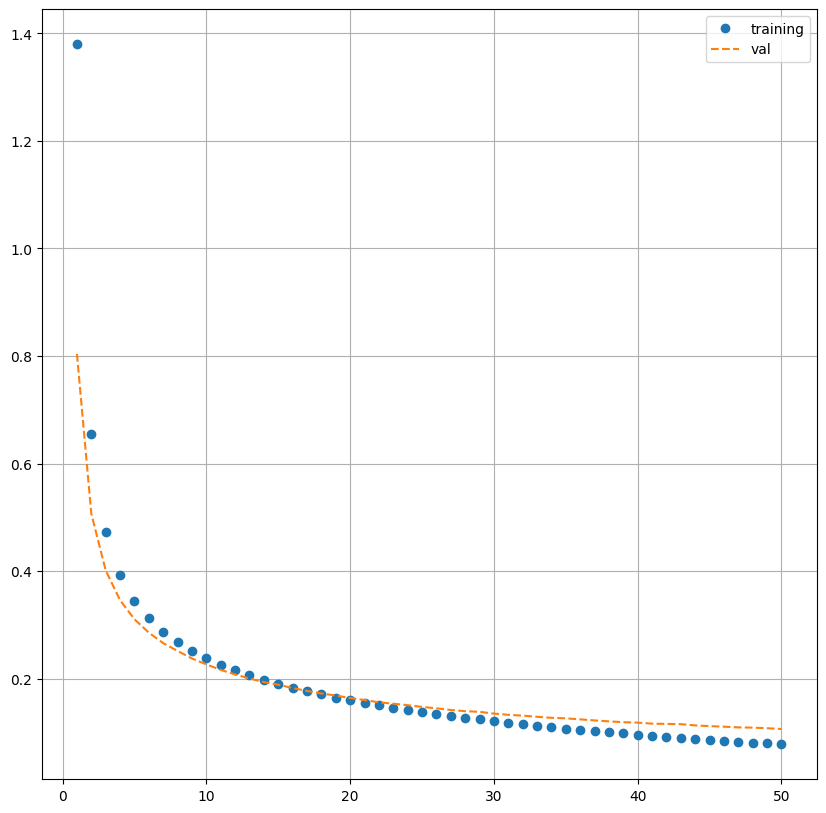

In [24]:
history_dict4 = history4.history
loss_values4 = history_dict4['loss']
val_loss_values4 = history_dict4['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values4)+1)
plt.plot(epoch,loss_values4, 'o',label='training')
plt.plot(epoch,val_loss_values4, '--',label='val')
plt.legend()
plt.grid()
plt.show()

Modificación del modelo 3. aumenté el número de epocas a 50 y trabajé con una $\eta = 0.00005$. También modifiqué los $\beta's$ para una aprendizaje más lento.

Los resultados no mostraron sobreajuste, pero la tasa de aprendizaje fue más lenta y obtuvo un menor accurancy, 0.9697 respecto a un 0.9721 de la anterior configuración.

In [25]:
!git status
!git add .
!git commit -m "Modelo 4: cambio de parámetros del modelo 3 e incremento de épocas. No hay sobreajuste pero accurancy menor."
!git push

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
[main 180feef] Modelo 4: cambio de parámetros del modelo 3 e incremento de épocas. No hay sobreajuste pero accurancy menor.
 1 file changed, 1 insertion(+), 1 deletion(-)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 27.00 KiB | 3.00 MiB/s, done.
Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Jorge-1501/Redes-Neuronales
   813279b..180feef  main -> main


### Guardado de modelos

In [26]:
# Guardar el primer modelo
model3.save("modelo3.h5")

# Guardar el segundo modelo con un nombre diferente
model4.save("modelo4.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!git status
!git add .
!git commit -m "Modelo 4: cambio de parámetros del modelo 3 e incremento de épocas. No hay sobreajuste pero accurancy menor."
!git push

## Parte 3
Implimentación de regularizadores

#### L1

In [ ]:
from numpy.lib.histograms import histogram
histogram

#### L2

#### L1-L2

#### Dropout y L1-L2

# Reporte de resultados

In [ ]:
!pwd